In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Load Image

In [67]:
def read_file(filename):
    img = cv2.imread(filename,cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

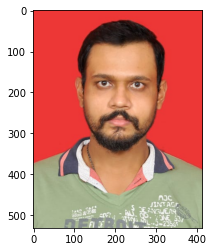

In [68]:
filename = "C:\\Users\\HP ELITEBOOK 810 G3\\Downloads\\IMG-20201222-WA0005.jpg"
img = read_file(filename)

### Create Edge Mark

In [109]:
"""
input: Input Image
output: Edges of Image

"""
def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY, line_size, blur_value)
    return edges

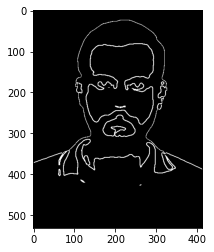

In [115]:
line_size, blur_value = 5,7
edges = edge_mask(img, line_size, blur_value)
plt.imshow(edges, cmap='binary')
plt.show()

### Reduce the Color Palette

In [116]:
def color_quantization(img, k):
    
    #Transform the image
    data = np.float32(img).reshape((-1,3)) 
    
    # Determine Criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    
    #Implementing K-Means
    
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)

    
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    
    return result
    

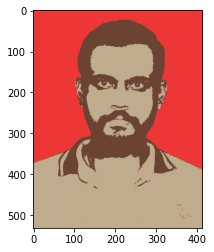

In [117]:
img = color_quantization(img, k=5)

plt.imshow(img)
plt.show()

### Combine Edge Mask with the quantize img

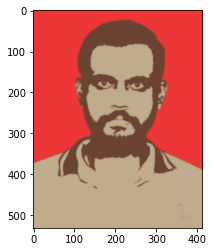

In [118]:
# Reduce the noise

blurred = cv2.bilateralFilter(img, d=7, sigmaColor= 200, sigmaSpace= 200)

plt.imshow(blurred)
plt.show()

### Combine Edge Mask with the Quantize img

In [119]:
def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask= edges)
    
    plt.imshow(c)
    plt.show()

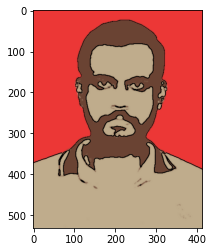

In [120]:
cartoon()